# Filtros lineales de detección de contornos

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

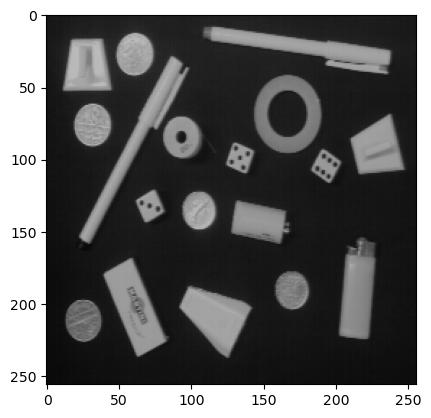

In [2]:
objImg = cv2.imread("images/OBJECTS.png", 0)
plt.imshow(objImg, cmap='gray', vmin=0, vmax=255)

In [3]:
objImg.dtype

dtype('uint8')

In [4]:
# Convertimos la imágen a Int32
converted = objImg.astype(np.int32)
converted.dtype

dtype('int32')

*Operador de Sobel*

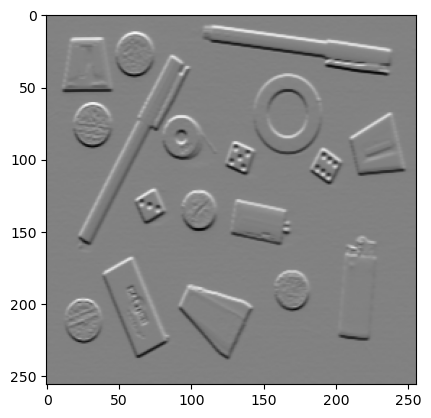

In [ ]:
from skimage.filters import sobel_h, sobel_v, sobel

#Aplica el filtro Sobel horizontal
img_sh = sobel_h(converted)

plt.imshow(img_sh, cmap='gray')


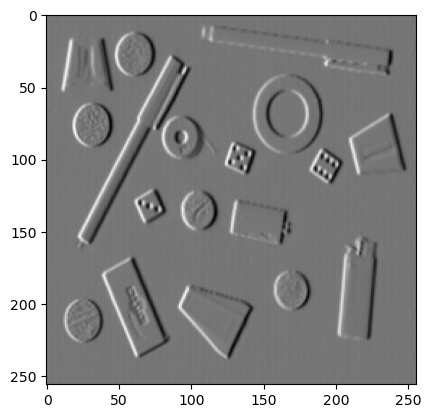

In [8]:
#Aplica el filtro Sobel vertical
img_sv = sobel_v(converted)

plt.imshow(img_sv, cmap='gray')

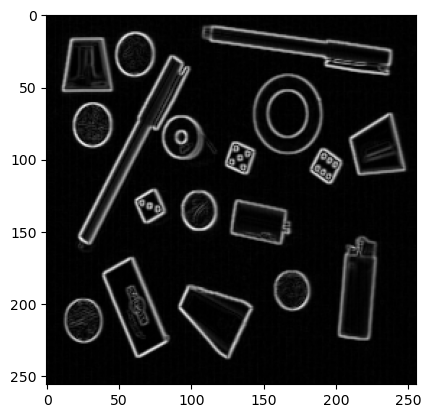

In [11]:
# Usando la aproximación
img_norma_aprox = np.abs(img_sh) + np.abs(img_sv)
plt.imshow(img_norma_aprox, cmap='gray')

Lo que podemos ver en las dos primeras imágenes es que se obtuvo la componente en x y y del gradiente de la imágen original, esto lo que quiere decir es que mirábamos como cambiaba el brillo de la imágen si nos movíamos en dirección vertical u horizontal.

Por este motivo en la primera imágen vemos sombras horizontales, puesto que al haber un cambio en un borde lo que ocurre es que en la imágen este cambio se representa como blanco o negro dependiendo si el cambio fue positivo (hacia un color más claro) o negativo (hacia un color más oscuro).

En la siguiente imágen seguimos viendo lo mismo pero las sobras se marcan verticales pusto que nos movemos de izquierda a derecha. Cabe resaltar que en ambas imágenes el fondo es gris puesto que no hay cambios en el fondo de la imágen y eso representa una derivada de 0.

Finalmente en la ultima imágen vemos la norma del vector gradiente, que es la mágnitud del cambio sin importar si es positivo o negativo. Esto marca todos los bordes de los objetos en blanco puesto que hicimos al sacar el valor absoluto que todos nuestros valores sean positivos y altos si hay un borde, y si no son negros los píxeles.

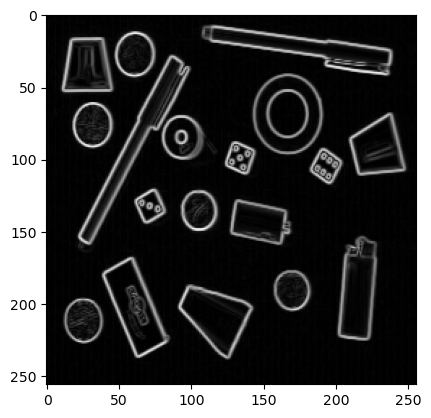

In [13]:
# Sobel completo

img_sobel = sobel(converted)
plt.imshow(img_sobel, cmap='gray')

Podemos ver que la imágen es idéntica a la anterior puesto que lo que hace la función sobel es sacar la norma de los gradientes, con la operacion que hicimos en la anterior imágen.

*Operador de prewitt*

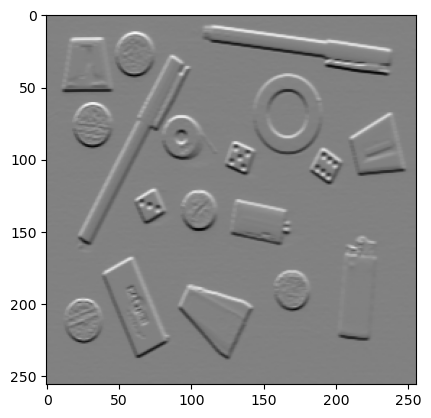

In [ ]:
from skimage.filters import prewitt_h, prewitt_v, prewitt

#Aplica el filtro Prewitt horizontal
img_shp = prewitt_h(converted)

plt.imshow(img_shp, cmap='gray')

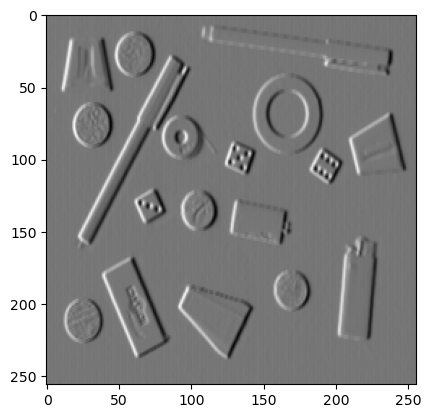

In [15]:
#Aplica el filtro Prewitt vertical
img_svp = prewitt_v(converted)

plt.imshow(img_svp, cmap='gray')

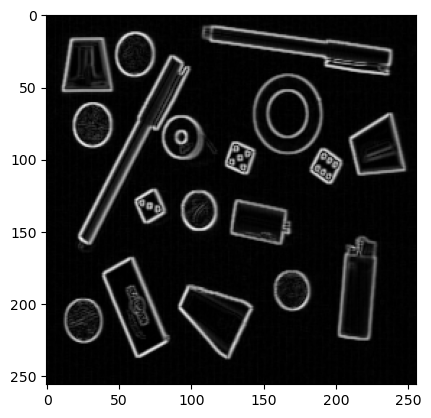

In [16]:
# Usando la aproximación
img_norma_aproxp = np.abs(img_shp) + np.abs(img_svp)
plt.imshow(img_norma_aproxp, cmap='gray')

Lo que podemos ver con Prewitt es un resultado muy similar a lo que ocurrió con Sobel. Esto tiene mucho sentido puesto que la matriz kernel es muy parecida, solo difiere un dos que utiliza Sobel en la posicion media para hacer que los píxeles directamente laterales tengan un poco más de peso en el cálculo de la convolución. Se supone que Sobel es más resistente al ruido Gausiano que Prewitt debido a esto, sin embargo lo que acabamos viendo es que las diferencias no son tan considerables en nuestra imágen.

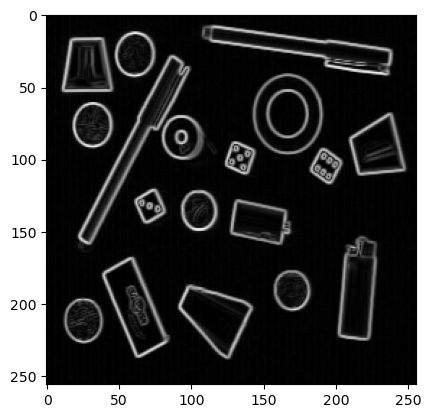

In [17]:
# Prewitt completo

img_prewitt = prewitt(converted)
plt.imshow(img_prewitt, cmap='gray')

*Diferencia entre Sobel y Prewitt*

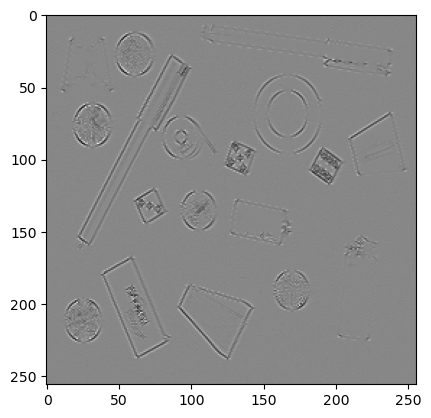

In [21]:
diferencia = cv2.subtract(img_prewitt, img_sobel)
plt.imshow(diferencia, cmap='gray')

Lo que podemos observar aquí es que sobel tenía unos border más fuertemente marcados, por esto al encontrar la diferencia se ven rayas negras puesto que los valores de sobel en bordes erán más altos que los de prewitt.

In [23]:
# Kernels de Prewitt
px = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
py = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])

# Kernels de Sobel
sx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
sy = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [24]:
# Caso 1: Frontera horizontal
m1 = np.array([[0, 0, 0], [0, 0, 0], [255, 255, 255]])

# Caso 2: Frontera vertical
m2 = np.array([[0, 0, 255], [0, 0, 255], [0, 0, 255]])

# Caso 3: Frontera oblicua
m3 = np.array([[0, 0, 255], [0, 255, 255], [255, 255, 255]])

In [ ]:
def calcular_gradientes(matriz, nombre):
    # Cálculos Prewitt
    gx_p = np.sum(matriz * px)
    gy_p = np.sum(matriz * py)
    norma_p = np.abs(gx_p) + np.abs(gy_p) # Aproximación según taller
    
    # Cálculos Sobel
    gx_s = np.sum(matriz * sx)
    gy_s = np.sum(matriz * sy)
    norma_s = np.abs(gx_s) + np.abs(gy_s) # Aproximación según taller
    
    print(f"--- Resultados para: {nombre} ---")
    print(f"Prewitt -> gx: {gx_p}, gy: {gy_p}, Norma: {norma_p}")
    print(f"Sobel   -> gx: {gx_s}, gy: {gy_s}, Norma: {norma_s}\n")

# Ejecutar para cada caso
calcular_gradientes(m1, "Frontera Horizontal")
calcular_gradientes(m2, "Frontera Vertical")
calcular_gradientes(m3, "Frontera Oblicua")

--- Resultados para: Frontera Horizontal ---
Prewitt -> gx: 765, gy: 0, Norma: 765
Sobel   -> gx: 1020, gy: 0, Norma: 1020

--- Resultados para: Frontera Vertical ---
Prewitt -> gx: 0, gy: 765, Norma: 765
Sobel   -> gx: 0, gy: 1020, Norma: 1020

--- Resultados para: Frontera Oblicua ---
Prewitt -> gx: 510, gy: 510, Norma: 1020
Sobel   -> gx: 765, gy: 765, Norma: 1530



: 

Lo que podemos ver esque Sobel suele dar valores más grandes de norma debido a que el dos que se encuentra en el filtro aplifica el cálculo de este valor. Esto lo que consigue es que tengamos bordes mucho más fuertes y definidos, a la vez que se reduce el ruido.